In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

## số liệu thống kê mô tả

In [60]:
data_train = pd.read_csv('data/train.csv')
data_test = pd.read_csv('data/test.csv')
features = ['id', 'cycle', 'setting1', 'setting2', 'setting3','s1','s2', 's3', 's4','s5', 's6',  's7', 's8', 's9','s10',  's11', 's12', 's13', 's14', 's15',  's16',
            's17', 's18', 's19',  's20', 's21','ttf','label_bnc']

data_train[features].describe()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc
count,20631.000000,20631.000000,20631.000000,20631.000000,20631.0,20631.00,20631.000000,20631.000000,20631.000000,2.063100e+04,...,20631.000000,20631.000000,2.063100e+04,20631.000000,20631.0,20631.0,20631.000000,20631.000000,20631.000000,20631.000000
mean,51.506568,108.807862,-0.000009,0.000002,100.0,518.67,642.680934,1590.523119,1408.933782,1.462000e+01,...,8143.752722,8.442146,3.000000e-02,393.210654,2388.0,100.0,38.816271,23.289705,107.807862,0.150259
std,29.227633,68.880990,0.002187,0.000293,0.0,0.00,0.500053,6.131150,9.000605,1.776400e-15,...,19.076176,0.037505,1.387812e-17,1.548763,0.0,0.0,0.180746,0.108251,68.880990,0.357334
min,1.000000,1.000000,-0.008700,-0.000600,100.0,518.67,641.210000,1571.040000,1382.250000,1.462000e+01,...,8099.940000,8.324900,3.000000e-02,388.000000,2388.0,100.0,38.140000,22.894200,0.000000,0.000000
25%,26.000000,52.000000,-0.001500,-0.000200,100.0,518.67,642.325000,1586.260000,1402.360000,1.462000e+01,...,8133.245000,8.414900,3.000000e-02,392.000000,2388.0,100.0,38.700000,23.221800,51.000000,0.000000
50%,52.000000,104.000000,0.000000,0.000000,100.0,518.67,642.640000,1590.100000,1408.040000,1.462000e+01,...,8140.540000,8.438900,3.000000e-02,393.000000,2388.0,100.0,38.830000,23.297900,103.000000,0.000000
75%,77.000000,156.000000,0.001500,0.000300,100.0,518.67,643.000000,1594.380000,1414.555000,1.462000e+01,...,8148.310000,8.465600,3.000000e-02,394.000000,2388.0,100.0,38.950000,23.366800,155.000000,0.000000
max,100.000000,362.000000,0.008700,0.000600,100.0,518.67,644.530000,1616.910000,1441.490000,1.462000e+01,...,8293.720000,8.584800,3.000000e-02,400.000000,2388.0,100.0,39.430000,23.618400,361.000000,1.000000


In [61]:
data_train[features].head()

,id,cycle,setting1,setting2,setting3,s1,s2,s3,s4,s5,...,s14,s15,s16,s17,s18,s19,s20,s21,ttf,label_bnc
0,1,1,-0.0007,-0.0004,100.0,518.67,641.82,1589.70,1400.60,14.62,...,8138.62,8.4195,0.03,392,2388,100.0,39.06,23.4190,191,0
1,1,2,0.0019,-0.0003,100.0,518.67,642.15,1591.82,1403.14,14.62,...,8131.49,8.4318,0.03,392,2388,100.0,39.00,23.4236,190,0
2,1,3,-0.0043,0.0003,100.0,518.67,642.35,1587.99,1404.20,14.62,...,8133.23,8.4178,0.03,390,2388,100.0,38.95,23.3442,189,0
3,1,4,0.0007,0.0000,100.0,518.67,642.35,1582.79,1401.87,14.62,...,8133.83,8.3682,0.03,392,2388,100.0,38.88,23.3739,188,0
4,1,5,-0.0019,-0.0002,100.0,518.67,642.37,1582.85,1406.22,14.62,...,8133.80,8.4294,0.03,393,2388,100.0,38.90,23.4044,187,0


In [62]:
data_train[features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20631 entries, 0 to 20630
Data columns (total 28 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         20631 non-null  int64  
 1   cycle      20631 non-null  int64  
 2   setting1   20631 non-null  float64
 3   setting2   20631 non-null  float64
 4   setting3   20631 non-null  float64
 5   s1         20631 non-null  float64
 6   s2         20631 non-null  float64
 7   s3         20631 non-null  float64
 8   s4         20631 non-null  float64
 9   s5         20631 non-null  float64
 10  s6         20631 non-null  float64
 11  s7         20631 non-null  float64
 12  s8         20631 non-null  float64
 13  s9         20631 non-null  float64
 14  s10        20631 non-null  float64
 15  s11        20631 non-null  float64
 16  s12        20631 non-null  float64
 17  s13        20631 non-null  float64
 18  s14        20631 non-null  float64
 19  s15        20631 non-null  float64
 20  s16   

In [63]:
data_train[features].shape

(20631, 28)

In [64]:
data_train[features].dtypes

id             int64
cycle          int64
setting1     float64
setting2     float64
setting3     float64
s1           float64
s2           float64
s3           float64
s4           float64
s5           float64
s6           float64
s7           float64
s8           float64
s9           float64
s10          float64
s11          float64
s12          float64
s13          float64
s14          float64
s15          float64
s16          float64
s17            int64
s18            int64
s19          float64
s20          float64
s21          float64
ttf            int64
label_bnc      int64
dtype: object

In [65]:
X = data_train[features]
y = data_train['ttf']

## xem độ tương quan tuyến tính của các feature

<AxesSubplot:>

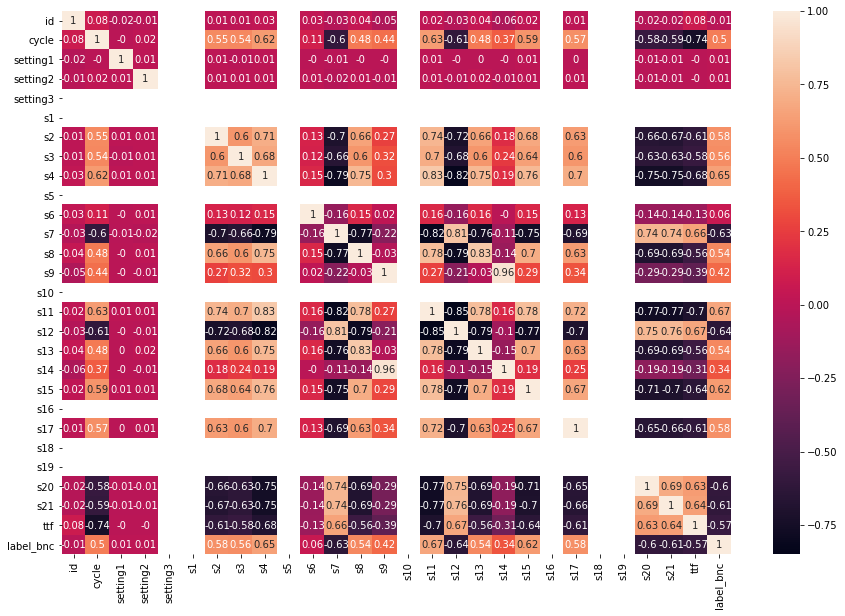

In [66]:
# we create a correlation matrix that measures the linear relationships between the variables.
correlation_matrix = data_train[features].corr().round(2)
# annot = True to print the values inside the square
plt.figure(figsize=(15,10))
sns.heatmap(data=correlation_matrix, annot=True, )

In [67]:
col_names = ['cycle','s2', 's3', 's4', 's7', 's8', 's9', 's11', 's12', 's13', 's14', 's15',  's17',  's20', 's21']

## Visualize

<AxesSubplot:xlabel='s13', ylabel='Count'>

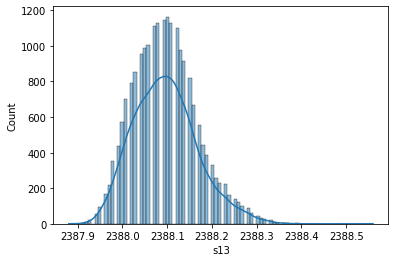

In [68]:
sns.histplot(data=data_train[col_names], x="s13",kde=True)

Text(0, 0.5, 'ttf')

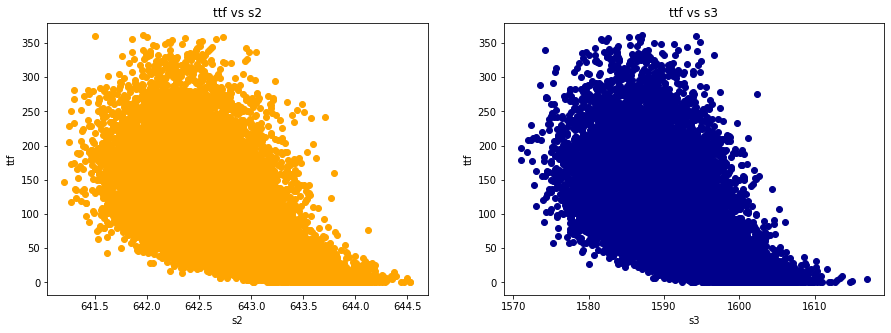

In [69]:
# sample plot data
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.scatter(data_train.s2, data_train.ttf, c='orange')
plt.title('ttf vs s2')
plt.xlabel('s2')
plt.ylabel('ttf')

plt.subplot(1,2,2)
plt.scatter(data_train.s3, data_train.ttf, c='darkblue')
plt.title('ttf vs s3')
plt.xlabel('s3')
plt.ylabel('ttf')

<AxesSubplot:>

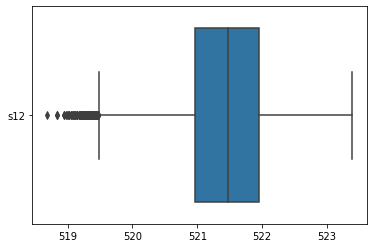

In [70]:
sns.boxplot( data = data_train[col_names], orient="h", order=['s12'])

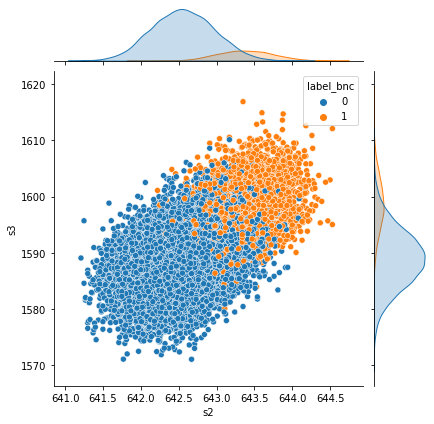

In [71]:
sns.jointplot(data=data_train, x="s2", y="s3", hue="label_bnc")

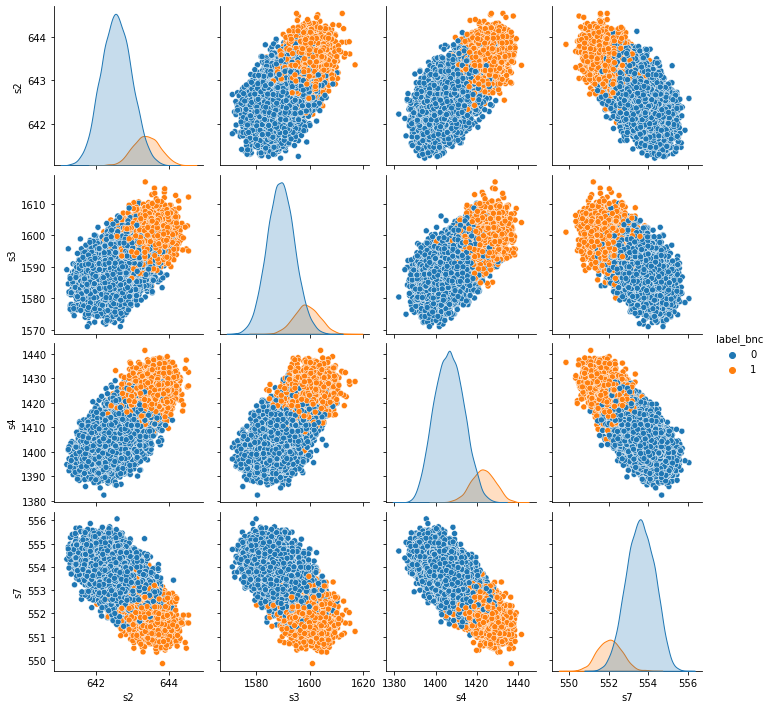

In [72]:
sns.pairplot(data_train, hue='label_bnc', vars=['s2', 's3', 's4','s7'])

<AxesSubplot:xlabel='s2', ylabel='s3'>

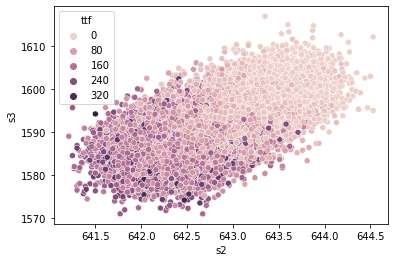

In [73]:
sns.scatterplot(data=data_train, x="s2", y="s3" , hue = 'ttf')

<AxesSubplot:ylabel='s21'>

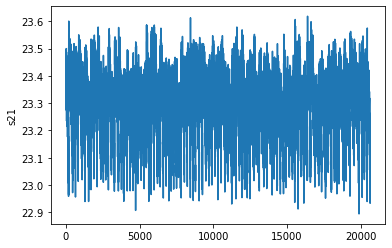

In [135]:
sns.lineplot(data=data_train["s21"])

<AxesSubplot:xlabel='s2', ylabel='s3'>

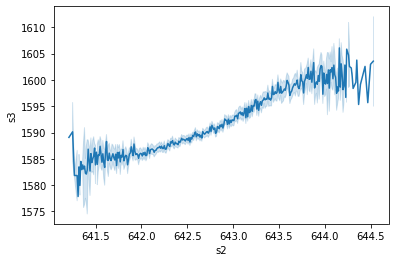

In [137]:
sns.lineplot(data=data_train[col_names],x="s2", y="s3")

## giảm chiều

In [76]:
X_train =data_train[col_names]
y_train = data_train['ttf']
X_test = data_test[col_names]
y_test = data_test['ttf']

In [77]:
#chuẩn hóa
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train)
X_test_std = sc.transform(X_test)


In [78]:
#tính hiệp phương sai và giá trị riêng
cov_mat = np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print('\nEigenvalues \n%s' % eigen_vals)


Eigenvalues 
[9.4837523  2.16724261 0.02927303 0.44755124 0.4124203  0.36826034
 0.34568638 0.14614097 0.17242522 0.17606016 0.19504531 0.20603814
 0.25484661 0.30611356 0.28987092]


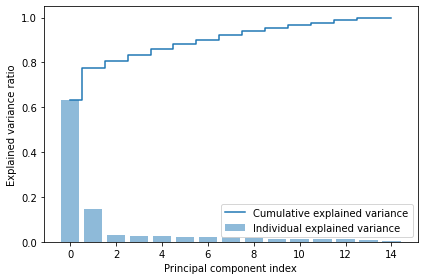

In [80]:
#vẽ biểu đồ hiện thị tỉ lệ phương sai
tot = np.sum(eigen_vals)
var_exp = [(i / tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

plt.bar(range(0,15), var_exp, alpha=0.5, align='center',
label='Individual explained variance')
plt.step(range(0,15), cum_var_exp, where='mid',
label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [143]:

from sklearn.decomposition import PCA
pca = PCA(n_components=2)
regression = LinearRegression()
# giảm chiều dữ liệu
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)



## dự đoán

In [144]:
regression.fit(X_train_pca, y_train)

LinearRegression()

In [145]:
w1 = regression.coef_
w1

array([-16.9685648 ,  -7.87869122])

In [146]:
w0 =  regression.intercept_ 
w0

107.80786195530999

In [147]:
y_pred = regression.predict(X_test_pca)
y_pred

array([158.29295979, 132.71385163,  91.87663255,  92.41443635,
       115.01645041, 118.53960914, 123.74603824,  94.82300835,
       118.59606114, 108.81259524, 103.53704576,  99.76106771,
        95.20581453, 120.08355654, 156.96722741, 133.76116861,
        74.99750356,  75.34799797, 117.48019157,  24.48840522,
       112.21985437, 146.97557042, 148.37414689,  28.71581736,
       139.69974699, 147.58731727, 126.14390477, 105.81834495,
       116.55461065,  94.97484808,   9.53335377,  97.21261277,
       119.99282227,   9.84652709,   1.54787661,  43.12634834,
        82.00985427,  72.71923507, 159.10560098,  37.07984719,
        91.74496306,  39.80230905,  77.05615952, 127.97525679,
        76.90030555,  68.03489739, 125.98437977, 119.39391633,
         9.8678741 , 130.11457802, 115.68389387,  36.25583848,
        41.88879642, 165.35663975, 139.98388988,  42.30765519,
       103.22014478,  63.27457553, 165.45035626, 110.80558543,
        47.64301365,  75.75090543,  83.00420109,  61.62

In [148]:
df2 = pd.DataFrame({'thực': y_test, 'dự đoán': y_pred})
df2.head(5)

,thực,dự đoán
0,112,158.292960
1,98,132.713852
2,69,91.876633
3,82,92.414436
4,91,115.016450


In [149]:
from sklearn.metrics import mean_squared_error
print('MSE on train set:', mean_squared_error(y_train,regression.predict(X_train_pca)))
print('MSE on test set:', mean_squared_error(y_test,regression.predict(X_test_pca)))
print('RMSE on train set:', np.sqrt(mean_squared_error(y_train,regression.predict(X_train_pca))/y_train.shape[0]))
print('RMSE on test set:', np.sqrt(mean_squared_error(y_test,regression.predict(X_test_pca))/y_test.shape[0]))

MSE on train set: 1879.2931988244923
MSE on test set: 946.4195125451502
RMSE on train set: 0.3018124365847893
RMSE on test set: 3.0763932007224795


In [150]:
# R^2 % của dự đoán
train_acc = regression.score(X=X_train_pca, y=y_train)
test_acc = regression.score(X_test_pca, y_test)
print("R^2 on train set:", round(train_acc*100,1), '%')
print("R^2 on test set:", round(test_acc*100,1), '%')

R^2 on train set: 60.4 %
R^2 on test set: 45.2 %


In [151]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=2, random_state=0)
regr.fit(X_train_pca, y_train)
y_pred = regr.predict(X_test_pca)
y_pred

array([164.52522204, 124.95692367,  66.7735265 ,  66.7735265 ,
       124.95692367, 124.95692367, 124.95692367,  66.7735265 ,
       124.95692367, 124.95692367,  66.7735265 , 124.95692367,
       119.22713526, 124.95692367, 164.95567203, 128.18723385,
       109.46402362,  66.7735265 , 124.95692367,  21.59546066,
       124.95692367, 135.39226867, 136.6208767 ,  66.7735265 ,
       125.36716727, 165.37488111, 124.95692367, 124.95692367,
       124.95692367,  66.7735265 ,  21.59546066, 124.95692367,
       124.95692367,  21.59546066,  21.59546066,  21.59546066,
        66.2952982 ,  66.7735265 , 166.26826064,  21.59546066,
        66.7735265 ,  21.59546066,  66.7735265 , 124.95692367,
        66.7735265 ,  66.7735265 , 124.95692367, 124.95692367,
        21.59546066, 124.95692367, 124.95692367,  66.2952982 ,
        65.84472424, 166.26826064, 134.16845431,  21.59546066,
       102.87765618,  21.59546066, 166.26826064, 124.95692367,
        21.59546066, 108.8730197 ,  66.7735265 ,  21.59

In [152]:
train_acc = regr.score(X=X_train_pca, y=y_train)
test_acc = regr.score(X_test_pca, y_test)
print("R^2 on train set:", round(train_acc*100,1), '%')
print("R^2 on test set:", round(test_acc*100,1), '%')

R^2 on train set: 56.3 %
R^2 on test set: 33.4 %


In [155]:
from sklearn.metrics import mean_squared_error
print('MSE on train set:', mean_squared_error(y_train,regr.predict(X_train_pca)))
print('MSE on test set:', mean_squared_error(y_test,regr.predict(X_test_pca)))
print('RMSE on train set:', np.sqrt(mean_squared_error(y_train,regr.predict(X_train_pca))/y_train.shape[0]))
print('RMSE on test set:', np.sqrt(mean_squared_error(y_test,regr.predict(X_test_pca))/y_test.shape[0]))

MSE on train set: 2072.6720713671307
MSE on test set: 1149.9756248126723
RMSE on train set: 0.31696051088132704
RMSE on test set: 3.391129052119179


## Phân loại

In [116]:
y1_train = data_train['label_bnc']
y1_test = data_test['label_bnc']

In [117]:
from sklearn.linear_model import LogisticRegression
lrClass = LogisticRegression()
lrClass.fit(X_train_pca,y1_train)

LogisticRegression()

In [118]:
ww1 = lrClass.coef_
ww1

array([[1.56755748, 0.36970728]])

In [119]:
ww0 = lrClass.intercept_ 
ww0

array([-5.705901])

In [120]:
y1_pred = lrClass.predict(X_test_pca)
y1_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [121]:
train_acc = lrClass.score(X=X_train_pca, y=y1_train)
test_acc = lrClass.score(X_test_pca, y1_test)
print("Accuracy on train set:", round(train_acc*100,1), '%')
print("Accuracy on test set:", round(test_acc*100,1), '%')

Accuracy on train set: 95.5 %
Accuracy on test set: 90.0 %


In [122]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
clf = LinearDiscriminantAnalysis()
clf.fit(X_train_pca,y1_train)
y_pred = clf.predict(X_test_pca)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [123]:
df2 = pd.DataFrame({'thực': y1_test, 'dự đoán': y1_pred})
df2.head(5)

,thực,dự đoán
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0


In [124]:
train_acc = clf.score(X=X_train_pca, y=y1_train)
test_acc = clf.score(X_test_pca, y1_test)
print("Accuracy on train set:", round(train_acc*100,1), '%')
print("Accuracy on test set:", round(test_acc*100,1), '%')

Accuracy on train set: 95.1 %
Accuracy on test set: 94.0 %


In [125]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train_pca,y1_train)
y_pred = clf.predict(X_test_pca)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [126]:
train_acc = clf.score(X=X_train_pca, y=y1_train)
test_acc = clf.score(X_test_pca, y1_test)
print("Accuracy on train set:", round(train_acc*100,1), '%')
print("Accuracy on test set:", round(test_acc*100,1), '%')

Accuracy on train set: 100.0 %
Accuracy on test set: 96.0 %


In [127]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X_train_pca,y1_train)
y_pred = clf.predict(X_test_pca)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], dtype=int64)

In [128]:
train_acc = clf.score(X=X_train_pca, y=y1_train)
test_acc = clf.score(X_test_pca, y1_test)
print("Accuracy on train set:", round(train_acc*100,1), '%')
print("Accuracy on test set:", round(test_acc*100,1), '%')

Accuracy on train set: 100.0 %
Accuracy on test set: 91.0 %


In [129]:
from sklearn.svm import SVC
clf = SVC()
clf.fit(X_train_pca,y1_train)
y_pred = clf.predict(X_test_pca)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [130]:
train_acc = clf.score(X=X_train_pca, y=y1_train)
test_acc = clf.score(X_test_pca, y1_test)
print("Accuracy on train set:", round(train_acc*100,1), '%')
print("Accuracy on test set:", round(test_acc*100,1), '%')

Accuracy on train set: 96.0 %
Accuracy on test set: 92.0 %


In [131]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier()
neigh.fit(X_train_pca,y1_train)
y_pred = neigh.predict(X_test_pca)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1], dtype=int64)

In [132]:
train_acc = neigh.score(X=X_train_pca, y=y1_train)
test_acc = neigh.score(X_test_pca, y1_test)
print("Accuracy on train set:", round(train_acc*100,1), '%')
print("Accuracy on test set:", round(test_acc*100,1), '%')

Accuracy on train set: 96.8 %
Accuracy on test set: 93.0 %
